In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("csv/2021/schedules_2021.csv")

In [7]:
print(df)

             game_id  season game_type  week     gameday   weekday gametime  \
0     2021_01_DAL_TB    2021       REG     1  2021-09-09  Thursday    20:20   
1    2021_01_PHI_ATL    2021       REG     1  2021-09-12    Sunday    13:00   
2    2021_01_PIT_BUF    2021       REG     1  2021-09-12    Sunday    13:00   
3    2021_01_NYJ_CAR    2021       REG     1  2021-09-12    Sunday    13:00   
4    2021_01_MIN_CIN    2021       REG     1  2021-09-12    Sunday    13:00   
..               ...     ...       ...   ...         ...       ...      ...   
280    2021_20_LA_TB    2021       DIV    20  2022-01-23    Sunday    15:00   
281   2021_20_BUF_KC    2021       DIV    20  2022-01-23    Sunday    18:30   
282   2021_21_CIN_KC    2021       CON    21  2022-01-30    Sunday    15:00   
283    2021_21_SF_LA    2021       CON    21  2022-01-30    Sunday    18:30   
284   2021_22_LA_CIN    2021        SB    22  2022-02-13    Sunday    18:30   

    away_team  away_score home_team  ...  hits_allo

In [11]:
df = pd.read_csv("csv/2021/schedules_2021.csv", index_col='game_id')

In [12]:
print(df)

                 season game_type  week     gameday   weekday gametime  \
game_id                                                                  
2021_01_DAL_TB     2021       REG     1  2021-09-09  Thursday    20:20   
2021_01_PHI_ATL    2021       REG     1  2021-09-12    Sunday    13:00   
2021_01_PIT_BUF    2021       REG     1  2021-09-12    Sunday    13:00   
2021_01_NYJ_CAR    2021       REG     1  2021-09-12    Sunday    13:00   
2021_01_MIN_CIN    2021       REG     1  2021-09-12    Sunday    13:00   
...                 ...       ...   ...         ...       ...      ...   
2021_20_LA_TB      2021       DIV    20  2022-01-23    Sunday    15:00   
2021_20_BUF_KC     2021       DIV    20  2022-01-23    Sunday    18:30   
2021_21_CIN_KC     2021       CON    21  2022-01-30    Sunday    15:00   
2021_21_SF_LA      2021       CON    21  2022-01-30    Sunday    18:30   
2021_22_LA_CIN     2021        SB    22  2022-02-13    Sunday    18:30   

                away_team  away_score

In [13]:
df = df.drop(columns = ["gameday", "weekday", "gametime", "old_game_id", "gsis","nfl_detail_id", "pfr", "away_qb_id", "home_qb_id", "stadium_id", "stadium"])


In [14]:
print(df)

                 season game_type  week away_team  away_score home_team  \
game_id                                                                   
2021_01_DAL_TB     2021       REG     1       DAL          29        TB   
2021_01_PHI_ATL    2021       REG     1       PHI          32       ATL   
2021_01_PIT_BUF    2021       REG     1       PIT          23       BUF   
2021_01_NYJ_CAR    2021       REG     1       NYJ          14       CAR   
2021_01_MIN_CIN    2021       REG     1       MIN          24       CIN   
...                 ...       ...   ...       ...         ...       ...   
2021_20_LA_TB      2021       DIV    20        LA          30        TB   
2021_20_BUF_KC     2021       DIV    20       BUF          36        KC   
2021_21_CIN_KC     2021       CON    21       CIN          27        KC   
2021_21_SF_LA      2021       CON    21        SF          17        LA   
2021_22_LA_CIN     2021        SB    22        LA          23       CIN   

                 home_sc

In [15]:
df['div_game'] = df['div_game'].replace({0: "NO", 1: "YES"})

In [16]:
division_game = df[df["div_game"]== "YES"]

In [17]:
print(division_game)

                 season game_type  week away_team  away_score home_team  \
game_id                                                                   
2021_01_JAX_HOU    2021       REG     1       JAX          21       HOU   
2021_01_MIA_NE     2021       REG     1       MIA          17        NE   
2021_02_NYG_WAS    2021       REG     2       NYG          29       WAS   
2021_02_NO_CAR     2021       REG     2        NO           7       CAR   
2021_02_BUF_MIA    2021       REG     2       BUF          35       MIA   
...                 ...       ...   ...       ...         ...       ...   
2021_18_CAR_TB     2021       REG    18       CAR          17        TB   
2021_18_LAC_LV     2021       REG    18       LAC          32        LV   
2021_19_NE_BUF     2021        WC    19        NE          17       BUF   
2021_19_ARI_LA     2021        WC    19       ARI          11        LA   
2021_21_SF_LA      2021       CON    21        SF          17        LA   

                 home_sc

In [18]:
playoff_game_types = ['WC', 'DIV', 'CON', 'SB']

In [19]:
playoff_teams = set()
playoff_games = df[df['game_type'].isin(playoff_game_types)]
playoff_teams.update(playoff_games['home_team'].unique())
playoff_teams.update(playoff_games['away_team'].unique())

In [20]:
print(f"Teams that made playoffs: {sorted(playoff_teams)}")
print(f"Number of playoff teams: {len(playoff_teams)}")

Teams that made playoffs: ['ARI', 'BUF', 'CIN', 'DAL', 'GB', 'KC', 'LA', 'LV', 'NE', 'PHI', 'PIT', 'SF', 'TB', 'TEN']
Number of playoff teams: 14


In [21]:
df_filtered = df[
    (df['game_type'].isin(playoff_game_types)) |  # Keep all playoff games
    ((df['game_type'] == 'REG') & 
     ((df['home_team'].isin(playoff_teams)) | (df['away_team'].isin(playoff_teams))))  # Keep REG games with playoff teams
]

In [22]:
print(f"\nOriginal games: {len(df)}")
print(f"Filtered games: {len(df_filtered)}")
print(f"Games removed: {len(df) - len(df_filtered)}")


Original games: 285
Filtered games: 205
Games removed: 80


In [23]:
df = df_filtered

In [24]:
print(df)

                 season game_type  week away_team  away_score home_team  \
game_id                                                                   
2021_01_DAL_TB     2021       REG     1       DAL          29        TB   
2021_01_PHI_ATL    2021       REG     1       PHI          32       ATL   
2021_01_PIT_BUF    2021       REG     1       PIT          23       BUF   
2021_01_MIN_CIN    2021       REG     1       MIN          24       CIN   
2021_01_SF_DET     2021       REG     1        SF          41       DET   
...                 ...       ...   ...       ...         ...       ...   
2021_20_LA_TB      2021       DIV    20        LA          30        TB   
2021_20_BUF_KC     2021       DIV    20       BUF          36        KC   
2021_21_CIN_KC     2021       CON    21       CIN          27        KC   
2021_21_SF_LA      2021       CON    21        SF          17        LA   
2021_22_LA_CIN     2021        SB    22        LA          23       CIN   

                 home_sc

In [25]:
print(df.to_string())

                 season game_type  week away_team  away_score home_team  home_score location  result  total  overtime    pff       espn   ftn  away_rest  home_rest  away_moneyline  home_moneyline  spread_line  away_spread_odds  home_spread_odds  total_line  under_odds  over_odds div_game      roof     surface  temp  wind         away_qb_name        home_qb_name       away_coach       home_coach         referee  home_pass_rush_rating  home_sack_rate  qb_hit_rate.x  home_pressure_rate  home_pass_block_rating  home_sacks_allowed_rate  hits_allowed_rate.x  home_protection_rate  away_pass_rush_rating  away_sack_rate  qb_hit_rate.y  away_pressure_rate  away_pass_block_rating  away_sacks_allowed_rate  hits_allowed_rate.y  away_protection_rate
game_id                                                                                                                                                                                                                                                       

In [26]:
playoff_teams = ['TB', 'DAL', 'LA', 'GB', 'ARI', 'SF', 'PHI',  # NFC
                 'TEN', 'KC', 'BUF', 'CIN', 'LV', 'NE', 'PIT']  # AFC

In [27]:
df_playoff = df.copy()

In [28]:
away_stats = df_playoff.copy()
away_stats['team'] = away_stats['away_team']
away_stats['opponent'] = away_stats['home_team']
away_stats['points_scored'] = away_stats['away_score']
away_stats['points_allowed'] = away_stats['home_score']
away_stats['is_home'] = 0

In [29]:
away_stats = away_stats.rename(columns={
    'away_pass_rush_rating': 'pass_rush_rating',
    'away_sack_rate': 'sack_rate',
    'away_pressure_rate': 'pressure_rate',
    'away_pass_block_rating': 'pass_block_rating',
    'away_sacks_allowed_rate': 'sacks_allowed_rate',
    'away_protection_rate': 'protection_rate',
    'away_qb_name': 'qb_name',
    'away_coach': 'coach',
    'away_rest': 'rest_days',
    'away_moneyline': 'moneyline'
})

In [30]:
home_stats = df_playoff.copy()
home_stats['team'] = home_stats['home_team']
home_stats['opponent'] = home_stats['away_team']
home_stats['points_scored'] = home_stats['home_score']
home_stats['points_allowed'] = home_stats['away_score']
home_stats['is_home'] = 1

In [31]:
home_stats = home_stats.rename(columns={
    'home_pass_rush_rating': 'pass_rush_rating',
    'home_sack_rate': 'sack_rate',
    'home_pressure_rate': 'pressure_rate',
    'home_pass_block_rating': 'pass_block_rating',
    'home_sacks_allowed_rate': 'sacks_allowed_rate',
    'home_protection_rate': 'protection_rate',
    'home_qb_name': 'qb_name',
    'home_coach': 'coach',
    'home_rest': 'rest_days',
    'home_moneyline': 'moneyline'
})


In [32]:
cols_to_keep = ['team', 'opponent', 'points_scored', 'points_allowed', 
                'is_home', 'pass_rush_rating', 'sack_rate', 'pressure_rate',
                'pass_block_rating', 'sacks_allowed_rate', 'protection_rate',
                'qb_name', 'coach', 'rest_days', 'week', 'season']

combined_stats = pd.concat([
    away_stats[cols_to_keep],
    home_stats[cols_to_keep]
])

In [33]:
team_stats = combined_stats.groupby('team').agg({
    'points_scored': 'mean',
    'points_allowed': 'mean',
    'pass_rush_rating': 'mean',
    'sack_rate': 'mean',
    'pressure_rate': 'mean',
    'pass_block_rating': 'mean',
    'sacks_allowed_rate': 'mean',
    'protection_rate': 'mean',
    'is_home': 'sum',  # Total home games
    'week': 'count'  # Total games played
}).round(2)

In [34]:
team_stats = team_stats.rename(columns={
    'week': 'games_played',
    'is_home': 'home_games'
})


In [35]:
wins = combined_stats[combined_stats['points_scored'] > combined_stats['points_allowed']].groupby('team').size()
team_stats['wins'] = wins
team_stats['losses'] = team_stats['games_played'] - team_stats['wins']

In [36]:
team_stats['primary_qb'] = combined_stats.groupby('team')['qb_name'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
team_stats['coach'] = combined_stats.groupby('team')['coach'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])


In [37]:
team_stats = team_stats.reset_index()

In [38]:
team_stats = team_stats[team_stats['team'].isin(playoff_teams)]


In [39]:
print(team_stats)

   team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
0   ARI          25.56           22.22             10.46       0.06   
3   BUF          29.79           18.32              9.71       0.06   
6   CIN          26.29           21.81              9.66       0.06   
8   DAL          30.39           21.17             10.39       0.06   
11   GB          25.56           21.33              9.65       0.05   
15   KC          29.40           22.40              8.58       0.04   
16   LA          27.00           21.29              9.45       0.07   
18   LV          21.83           25.83             10.06       0.05   
21   NE          26.61           19.44              8.88       0.06   
25  PHI          25.50           23.11              7.88       0.04   
26  PIT          20.22           24.44             10.73       0.08   
28   SF          24.00           20.60             10.87       0.07   
29   TB          29.95           20.95             12.02       0.06   
30  TE

In [40]:
print(f"\nTotal playoff teams: {len(team_stats)}")


Total playoff teams: 14


In [41]:
team_stats["team"] = team_stats["team"].replace({"LA": "LAR"})

In [42]:
print(team_stats)

   team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
0   ARI          25.56           22.22             10.46       0.06   
3   BUF          29.79           18.32              9.71       0.06   
6   CIN          26.29           21.81              9.66       0.06   
8   DAL          30.39           21.17             10.39       0.06   
11   GB          25.56           21.33              9.65       0.05   
15   KC          29.40           22.40              8.58       0.04   
16  LAR          27.00           21.29              9.45       0.07   
18   LV          21.83           25.83             10.06       0.05   
21   NE          26.61           19.44              8.88       0.06   
25  PHI          25.50           23.11              7.88       0.04   
26  PIT          20.22           24.44             10.73       0.08   
28   SF          24.00           20.60             10.87       0.07   
29   TB          29.95           20.95             12.02       0.06   
30  TE

In [43]:
df_epa_2021 = pd.read_csv("csv/2021/nfl_team_complete_2021.csv")

In [44]:
print(df_epa_2021)

   team  passing_epa  total_pass_plays  rushing_epa  total_rush_plays  \
0   TEN     0.093529               634    -0.052316               535   
1    KC     0.215187               803    -0.020674               372   
2   BUF     0.162983               774    -0.047153               401   
3   CIN     0.159071               668    -0.098545               416   
4    LV     0.084497               724    -0.161134               404   
5    NE     0.136366               611    -0.011368               473   
6   PIT    -0.037970               755    -0.077919               400   
7    GB     0.218177               679    -0.000583               414   
8    TB     0.195955               794     0.024251               367   
9   DAL     0.166281               761    -0.054208               445   
10   LA     0.183665               678    -0.089154               397   
11  ARI     0.149256               702    -0.036757               455   
12   SF     0.174027               594    -0.022154

In [45]:
df_epa_2021["team"] = df_epa_2021["team"].replace({"LA": "LAR"})

In [46]:
print(df_epa_2021)

   team  passing_epa  total_pass_plays  rushing_epa  total_rush_plays  \
0   TEN     0.093529               634    -0.052316               535   
1    KC     0.215187               803    -0.020674               372   
2   BUF     0.162983               774    -0.047153               401   
3   CIN     0.159071               668    -0.098545               416   
4    LV     0.084497               724    -0.161134               404   
5    NE     0.136366               611    -0.011368               473   
6   PIT    -0.037970               755    -0.077919               400   
7    GB     0.218177               679    -0.000583               414   
8    TB     0.195955               794     0.024251               367   
9   DAL     0.166281               761    -0.054208               445   
10  LAR     0.183665               678    -0.089154               397   
11  ARI     0.149256               702    -0.036757               455   
12   SF     0.174027               594    -0.022154

In [47]:
playoff_teams = ['TB', 'DAL', 'LAR', 'GB', 'ARI', 'SF', 'PHI',  # NFC
                 'TEN', 'KC', 'BUF', 'CIN', 'LV', 'NE', 'PIT']  # AFC

In [48]:
df_epa_2021 = df_epa_2021[(df_epa_2021['team'].isin(playoff_teams))]

In [49]:
print(df_epa_2021)

   team  passing_epa  total_pass_plays  rushing_epa  total_rush_plays  \
0   TEN     0.093529               634    -0.052316               535   
1    KC     0.215187               803    -0.020674               372   
2   BUF     0.162983               774    -0.047153               401   
3   CIN     0.159071               668    -0.098545               416   
4    LV     0.084497               724    -0.161134               404   
5    NE     0.136366               611    -0.011368               473   
6   PIT    -0.037970               755    -0.077919               400   
7    GB     0.218177               679    -0.000583               414   
8    TB     0.195955               794     0.024251               367   
9   DAL     0.166281               761    -0.054208               445   
10  LAR     0.183665               678    -0.089154               397   
11  ARI     0.149256               702    -0.036757               455   
12   SF     0.174027               594    -0.022154

In [50]:
print(team_stats)

   team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
0   ARI          25.56           22.22             10.46       0.06   
3   BUF          29.79           18.32              9.71       0.06   
6   CIN          26.29           21.81              9.66       0.06   
8   DAL          30.39           21.17             10.39       0.06   
11   GB          25.56           21.33              9.65       0.05   
15   KC          29.40           22.40              8.58       0.04   
16  LAR          27.00           21.29              9.45       0.07   
18   LV          21.83           25.83             10.06       0.05   
21   NE          26.61           19.44              8.88       0.06   
25  PHI          25.50           23.11              7.88       0.04   
26  PIT          20.22           24.44             10.73       0.08   
28   SF          24.00           20.60             10.87       0.07   
29   TB          29.95           20.95             12.02       0.06   
30  TE

In [51]:
team_stats.merge(df_epa_2021)

Empty DataFrame
Columns: [team, points_scored, points_allowed, pass_rush_rating, sack_rate, pressure_rate, pass_block_rating, sacks_allowed_rate, protection_rate, home_games, games_played, wins, losses, primary_qb, coach, passing_epa, total_pass_plays, rushing_epa, total_rush_plays, total_offensive_epa, total_plays, defensive_epa, defensive_pass_epa, defensive_rush_epa, ties, win_pct, made_playoffs, conference, playoff_seed]
Index: []

[0 rows x 29 columns]

In [52]:
print(team_stats.columns)
print(df_epa_2021.columns)


Index(['team', 'points_scored', 'points_allowed', 'pass_rush_rating',
       'sack_rate', 'pressure_rate', 'pass_block_rating', 'sacks_allowed_rate',
       'protection_rate', 'home_games', 'games_played', 'wins', 'losses',
       'primary_qb', 'coach'],
      dtype='object')
Index(['team', 'passing_epa', 'total_pass_plays', 'rushing_epa',
       'total_rush_plays', 'total_offensive_epa', 'total_plays',
       'defensive_epa', 'defensive_pass_epa', 'defensive_rush_epa', 'wins',
       'losses', 'ties', 'win_pct', 'made_playoffs', 'conference',
       'playoff_seed'],
      dtype='object')


In [53]:
print(team_stats.dtypes)
print(df_epa_2021.dtypes)

team                   object
points_scored         float64
points_allowed        float64
pass_rush_rating      float64
sack_rate             float64
pressure_rate         float64
pass_block_rating     float64
sacks_allowed_rate    float64
protection_rate       float64
home_games              int64
games_played            int64
wins                  float64
losses                float64
primary_qb             object
coach                  object
dtype: object
team                    object
passing_epa            float64
total_pass_plays         int64
rushing_epa            float64
total_rush_plays         int64
total_offensive_epa    float64
total_plays              int64
defensive_epa          float64
defensive_pass_epa     float64
defensive_rush_epa     float64
wins                     int64
losses                   int64
ties                     int64
win_pct                float64
made_playoffs           object
conference              object
playoff_seed           float64
dtype: ob

In [54]:
print(team_stats.head())
print(df_epa_2021.head())

   team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
0   ARI          25.56           22.22             10.46       0.06   
3   BUF          29.79           18.32              9.71       0.06   
6   CIN          26.29           21.81              9.66       0.06   
8   DAL          30.39           21.17             10.39       0.06   
11   GB          25.56           21.33              9.65       0.05   

    pressure_rate  pass_block_rating  sacks_allowed_rate  protection_rate  \
0            0.21              93.00                0.06             0.86   
3            0.20              91.71                0.03             0.85   
6            0.18              88.18                0.08             0.76   
8            0.20              92.44                0.04             0.85   
11           0.18              91.48                0.05             0.83   

    home_games  games_played  wins  losses     primary_qb            coach  
0            8            18  11.

In [55]:
NFL_2021_team_stats = team_stats.merge(df_epa_2021, on='team', how='left').set_index("playoff_seed").sort_values('playoff_seed')

In [56]:
NFL_2021_team_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          25.56           21.33              9.65       0.05   
1.0           TEN          24.17           20.72              9.76       0.06   
2.0            KC          29.40           22.40              8.58       0.04   
2.0            TB          29.95           20.95             12.02       0.06   
3.0           BUF          29.79           18.32              9.71       0.06   
3.0           DAL          30.39           21.17             10.39       0.06   
4.0           CIN          26.29           21.81              9.66       0.06   
4.0           LAR          27.00           21.29              9.45       0.07   
5.0           ARI          25.56           22.22             10.46       0.06   
5.0            LV          21.83           25.83             10.06       0.05   
6.0            NE          26.61           19.44              8.88       0.06   
6.0            SF          24.00           20.60             10.87       0.07   
7.0           PHI          25.50           23.11              7.88       0.04   
7.0           PIT          20.22           24.44             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  home_games  ...  total_plays  defensive_epa  \
playoff_seed                               ...                               
1.0                      0.83           9  ...         1384       0.014161   
1.0                      0.75          10  ...         1470      -0.045445   
2.0                      0.86          12  ...         1459       0.014553   
2.0                      0.90          10  ...         1467      -0.055117   
3.0                      0.85          10  ...         1457      -0.112458   
3.0                      0.85           9  ...         1521      -0.087157   
4.0                      0.76          11  ...         1383      -0.035780   
4.0                      0.85          10  ...         1361      -0.028633   
5.0                      0.86           8  ...         1454      -0.050086   
5.0                      0.83           9  ...         1439       0.040506   
6.0                      0.83           9  ...         1374      -0.090059   
6.0                      0.81           8  ...         1357      -0.007788   
7.0                      0.84           8  ...         1388      -0.010782   
7.0                      0.85           9  ...         1469      -0.022900   

              defensive_pass_epa defensive_rush_epa wins_y  losses_y  ties  \
playoff_seed                                                                 
1.0                     0.032454          -0.000626     13         4     0   
1.0                     0.011451          -0.081972     12         5     0   
2.0                     0.091933  

In [57]:
NFL_2021_team_stats["superbowl_win"] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [58]:
NFL_2021_team_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          25.56           21.33              9.65       0.05   
1.0           TEN          24.17           20.72              9.76       0.06   
2.0            KC          29.40           22.40              8.58       0.04   
2.0            TB          29.95           20.95             12.02       0.06   
3.0           BUF          29.79           18.32              9.71       0.06   
3.0           DAL          30.39           21.17             10.39       0.06   
4.0           CIN          26.29           21.81              9.66       0.06   
4.0           LAR          27.00           21.29              9.45       0.07   
5.0           ARI          25.56           22.22             10.46       0.06   
5.0            LV          21.83           25.83             10.06       0.05   
6.0            NE          26.61           19.44              8.88       0.06   
6.0            SF          24.00           20.60             10.87       0.07   
7.0           PHI          25.50           23.11              7.88       0.04   
7.0           PIT          20.22           24.44             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  home_games  ...  defensive_epa  \
playoff_seed                               ...                  
1.0                      0.83           9  ...       0.014161   
1.0                      0.75          10  ...      -0.045445   
2.0                      0.86          12  ...       0.014553   
2.0                      0.90          10  ...      -0.055117   
3.0                      0.85          10  ...      -0.112458   
3.0                      0.85           9  ...      -0.087157   
4.0                      0.76          11  ...      -0.035780   
4.0                      0.85          10  ...      -0.028633   
5.0                      0.86           8  ...      -0.050086   
5.0                      0.83           9  ...       0.040506   
6.0                      0.83           9  ...      -0.090059   
6.0                      0.81           8  ...      -0.007788   
7.0                      0.84           8  ...      -0.010782   
7.0                      0.85           9  ...      -0.022900   

              defensive_pass_epa  defensive_rush_epa wins_y losses_y  ties  \
playoff_seed                                                                 
1.0                     0.032454           -0.000626     13        4     0   
1.0                     0.011451           -0.081972     12        5     0   
2.0                     0.091933           -0.066177     12        5     0   
2.0                    -0.039383           -0.112980     13        4     0   
3.0                    -0.111880           -0.106287     11        6     0   
3.0     

In [60]:
NFL_2021_team_stats["superbowl_win"] = NFL_2021_team_stats["superbowl_win"].replace({0: "NO", 1: "YES"})

In [61]:
NFL_2021_team_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          25.56           21.33              9.65       0.05   
1.0           TEN          24.17           20.72              9.76       0.06   
2.0            KC          29.40           22.40              8.58       0.04   
2.0            TB          29.95           20.95             12.02       0.06   
3.0           BUF          29.79           18.32              9.71       0.06   
3.0           DAL          30.39           21.17             10.39       0.06   
4.0           CIN          26.29           21.81              9.66       0.06   
4.0           LAR          27.00           21.29              9.45       0.07   
5.0           ARI          25.56           22.22             10.46       0.06   
5.0            LV          21.83           25.83             10.06       0.05   
6.0            NE          26.61           19.44              8.88       0.06   
6.0            SF          24.00           20.60             10.87       0.07   
7.0           PHI          25.50           23.11              7.88       0.04   
7.0           PIT          20.22           24.44             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  home_games  ...  defensive_epa  \
playoff_seed                               ...                  
1.0                      0.83           9  ...       0.014161   
1.0                      0.75          10  ...      -0.045445   
2.0                      0.86          12  ...       0.014553   
2.0                      0.90          10  ...      -0.055117   
3.0                      0.85          10  ...      -0.112458   
3.0                      0.85           9  ...      -0.087157   
4.0                      0.76          11  ...      -0.035780   
4.0                      0.85          10  ...      -0.028633   
5.0                      0.86           8  ...      -0.050086   
5.0                      0.83           9  ...       0.040506   
6.0                      0.83           9  ...      -0.090059   
6.0                      0.81           8  ...      -0.007788   
7.0                      0.84           8  ...      -0.010782   
7.0                      0.85           9  ...      -0.022900   

              defensive_pass_epa  defensive_rush_epa wins_y losses_y  ties  \
playoff_seed                                                                 
1.0                     0.032454           -0.000626     13        4     0   
1.0                     0.011451           -0.081972     12        5     0   
2.0                     0.091933           -0.066177     12        5     0   
2.0                    -0.039383           -0.112980     13        4     0   
3.0                    -0.111880           -0.106287     11        6     0   
3.0     

In [62]:
NFL_2021_team_stats = NFL_2021_team_stats.drop(columns = ["made_playoffs"])

In [63]:
NFL_2021_team_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          25.56           21.33              9.65       0.05   
1.0           TEN          24.17           20.72              9.76       0.06   
2.0            KC          29.40           22.40              8.58       0.04   
2.0            TB          29.95           20.95             12.02       0.06   
3.0           BUF          29.79           18.32              9.71       0.06   
3.0           DAL          30.39           21.17             10.39       0.06   
4.0           CIN          26.29           21.81              9.66       0.06   
4.0           LAR          27.00           21.29              9.45       0.07   
5.0           ARI          25.56           22.22             10.46       0.06   
5.0            LV          21.83           25.83             10.06       0.05   
6.0            NE          26.61           19.44              8.88       0.06   
6.0            SF          24.00           20.60             10.87       0.07   
7.0           PHI          25.50           23.11              7.88       0.04   
7.0           PIT          20.22           24.44             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  home_games  ...  total_plays  defensive_epa  \
playoff_seed                               ...                               
1.0                      0.83           9  ...         1384       0.014161   
1.0                      0.75          10  ...         1470      -0.045445   
2.0                      0.86          12  ...         1459       0.014553   
2.0                      0.90          10  ...         1467      -0.055117   
3.0                      0.85          10  ...         1457      -0.112458   
3.0                      0.85           9  ...         1521      -0.087157   
4.0                      0.76          11  ...         1383      -0.035780   
4.0                      0.85          10  ...         1361      -0.028633   
5.0                      0.86           8  ...         1454      -0.050086   
5.0                      0.83           9  ...         1439       0.040506   
6.0                      0.83           9  ...         1374      -0.090059   
6.0                      0.81           8  ...         1357      -0.007788   
7.0                      0.84           8  ...         1388      -0.010782   
7.0                      0.85           9  ...         1469      -0.022900   

              defensive_pass_epa defensive_rush_epa wins_y  losses_y  ties  \
playoff_seed                                                                 
1.0                     0.032454          -0.000626     13         4     0   
1.0                     0.011451          -0.081972     12         5     0   
2.0                     0.091933  

In [64]:
NFL_2021_team_stats['points_scored'].mean()

np.float64(26.162142857142857)

In [65]:
teams_score_more_than_avg = NFL_2021_team_stats[NFL_2021_team_stats['points_scored'] >= 26]

In [66]:
teams_score_more_than_avg

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
2.0            KC          29.40           22.40              8.58       0.04   
2.0            TB          29.95           20.95             12.02       0.06   
3.0           BUF          29.79           18.32              9.71       0.06   
3.0           DAL          30.39           21.17             10.39       0.06   
4.0           CIN          26.29           21.81              9.66       0.06   
4.0           LAR          27.00           21.29              9.45       0.07   
6.0            NE          26.61           19.44              8.88       0.06   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
6.0                    0.19              92.19                0.05   

              protection_rate  home_games  ...  total_plays  defensive_epa  \
playoff_seed                               ...                               
2.0                      0.86          12  ...         1459       0.014553   
2.0                      0.90          10  ...         1467      -0.055117   
3.0                      0.85          10  ...         1457      -0.112458   
3.0                      0.85           9  ...         1521      -0.087157   
4.0                      0.76          11  ...         1383      -0.035780   
4.0                      0.85          10  ...         1361      -0.028633   
6.0                      0.83           9  ...         1374      -0.090059   

              defensive_pass_epa defensive_rush_epa wins_y  losses_y  ties  \
playoff_seed                                                                 
2.0                     0.091933          -0.066177     12         5     0   
2.0                    -0.039383          -0.112980     13         4     0   
3.0                    -0.111880          -0.106287     11         6     0   
3.0                    -0.111803          -0.042554     12         5     0   
4.0                     0.023763          -0.080219     10         7     0   
4.0                     0.029947          -0.113141     12         5     0   
6.0                    -0.053937          -0.082298     10         7     0   

               win_pct  conference  superbowl_win  
playoff_seed                                       
2.0           0.705882         AFC             NO  
2.0           0.764706         NFC             NO  
3.0           0.647059         AFC             NO  
3.0           0.705882         NFC             NO  
4.0           0.588235         AFC             NO  
4.0           0.705882         NFC            YES  
6.0           0.588235         AFC             NO  

[7 rows x 30 columns]

In [67]:
df_playoff


season game_type  week away_team  away_score home_team  \
game_id                                                                   
2021_01_DAL_TB     2021       REG     1       DAL          29        TB   
2021_01_PHI_ATL    2021       REG     1       PHI          32       ATL   
2021_01_PIT_BUF    2021       REG     1       PIT          23       BUF   
2021_01_MIN_CIN    2021       REG     1       MIN          24       CIN   
2021_01_SF_DET     2021       REG     1        SF          41       DET   
...                 ...       ...   ...       ...         ...       ...   
2021_20_LA_TB      2021       DIV    20        LA          30        TB   
2021_20_BUF_KC     2021       DIV    20       BUF          36        KC   
2021_21_CIN_KC     2021       CON    21       CIN          27        KC   
2021_21_SF_LA      2021       CON    21        SF          17        LA   
2021_22_LA_CIN     2021        SB    22        LA          23       CIN   

                 home_score location  result  total  ...  hits_allowed_rate.x  \
game_id                                              ...                        
2021_01_DAL_TB           31     Home       2     60  ...             0.071788   
2021_01_PHI_ATL           6     Home     -26     38  ...             0.193985   
2021_01_PIT_BUF          16     Home      -7     39  ...             0.117571   
2021_01_MIN_CIN          27     Home       3     51  ...             0.157186   
2021_01_SF_DET           33     Home      -8     74  ...             0.137778   
...                     ...      ...     ...    ...  ...                  ...   
2021_20_LA_TB            27     Home      -3     57  ...             0.071788   
2021_20_BUF_KC           42     Home       6     78  ...             0.108344   
2021_21_CIN_KC           24     Home      -3     51  ...             0.108344   
2021_21_SF_LA            20     Home       3     37  ...             0.109145   
2021_22_LA_CIN           20  Neutral      -3     43  ...             0.157186   

                 home_protection_rate  away_pass_rush_rating  away_sack_rate  \
game_id                                                                        
2021_01_DAL_TB               0.899244              10.390516        0.055935   
2021_01_PHI_ATL              0.745865               7.881417        0.042773   
2021_01_PIT_BUF              0.847545              10.729023        0.080058   
2021_01_MIN_CIN              0.760479              10.197145        0.067639   
2021_01_SF_DET               0.808889              10.871184        0.071535   
...                               ...                    ...             ...   
2021_20_LA_TB                0.899244               9.447166        0.068587   
2021_20_BUF_KC               0.856787               9.706546        0.063733   
2021_21_CIN_KC               0.856787               9.656652        0.057299   
2021_21_SF_LA                0.845133              10.871184        0.071535   
2021_22_LA_CIN               0.760479               9.447166        0.068587   

                 qb_hit_rate.y  away_pressure_rate  away_pass_block_rating  \
game_id                                                                      
2021_01_DAL_TB        0.147340            0.203274               92.441472   
2021_01_PHI_ATL       0.117994            0.160767               92.982456   
2021_01_PIT_BUF       0.147016            0.227074               92.216817   
2021_01_MIN_CIN       0.131300            0.198939               91.159830   
2021_01_SF_DET        0.146051            0.217586               91.754123   
...                        ...                 ...                     ...   
2021_20_LA_TB         0.116598            0.185185               92.111195   
2021_20_BUF_KC        0.132018            0.195751               91.713483   
2021_21_CIN_KC        0.126876            0.184175               88.183161   
2021_21_SF_LA         0.146051            0.217586               91.754123   
2021_22_LA

In [68]:
la = df_playoff[(df_playoff['home_team'] == 'LA') | (df_playoff['away_team'] == 'LA')].copy()

In [69]:
la['la_points'] = la.apply(lambda row: row['home_score'] if row['home_team'] == 'LA' else row['away_score'], axis=1)

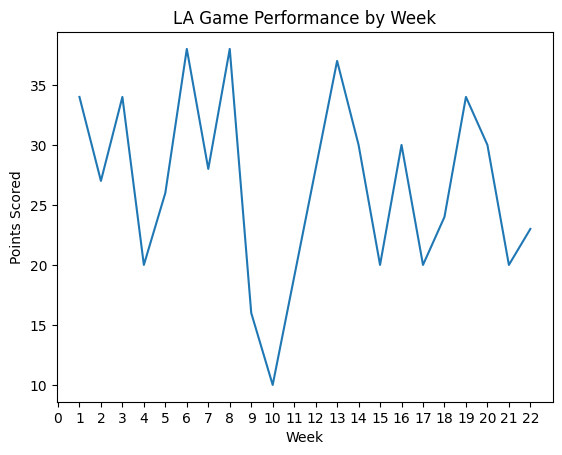

In [70]:
plt.plot(la['week'], la['la_points'])
plt.xticks(range(0, int(la['week'].max()) + 1, 1)) 
plt.xlabel('Week')
plt.ylabel('Points Scored')
plt.title('LA Game Performance by Week')
plt.show()

In [71]:
NFL_2021_team_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          25.56           21.33              9.65       0.05   
1.0           TEN          24.17           20.72              9.76       0.06   
2.0            KC          29.40           22.40              8.58       0.04   
2.0            TB          29.95           20.95             12.02       0.06   
3.0           BUF          29.79           18.32              9.71       0.06   
3.0           DAL          30.39           21.17             10.39       0.06   
4.0           CIN          26.29           21.81              9.66       0.06   
4.0           LAR          27.00           21.29              9.45       0.07   
5.0           ARI          25.56           22.22             10.46       0.06   
5.0            LV          21.83           25.83             10.06       0.05   
6.0            NE          26.61           19.44              8.88       0.06   
6.0            SF          24.00           20.60             10.87       0.07   
7.0           PHI          25.50           23.11              7.88       0.04   
7.0           PIT          20.22           24.44             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  home_games  ...  total_plays  defensive_epa  \
playoff_seed                               ...                               
1.0                      0.83           9  ...         1384       0.014161   
1.0                      0.75          10  ...         1470      -0.045445   
2.0                      0.86          12  ...         1459       0.014553   
2.0                      0.90          10  ...         1467      -0.055117   
3.0                      0.85          10  ...         1457      -0.112458   
3.0                      0.85           9  ...         1521      -0.087157   
4.0                      0.76          11  ...         1383      -0.035780   
4.0                      0.85          10  ...         1361      -0.028633   
5.0                      0.86           8  ...         1454      -0.050086   
5.0                      0.83           9  ...         1439       0.040506   
6.0                      0.83           9  ...         1374      -0.090059   
6.0                      0.81           8  ...         1357      -0.007788   
7.0                      0.84           8  ...         1388      -0.010782   
7.0                      0.85           9  ...         1469      -0.022900   

              defensive_pass_epa defensive_rush_epa wins_y  losses_y  ties  \
playoff_seed                                                                 
1.0                     0.032454          -0.000626     13         4     0   
1.0                     0.011451          -0.081972     12         5     0   
2.0                     0.091933  

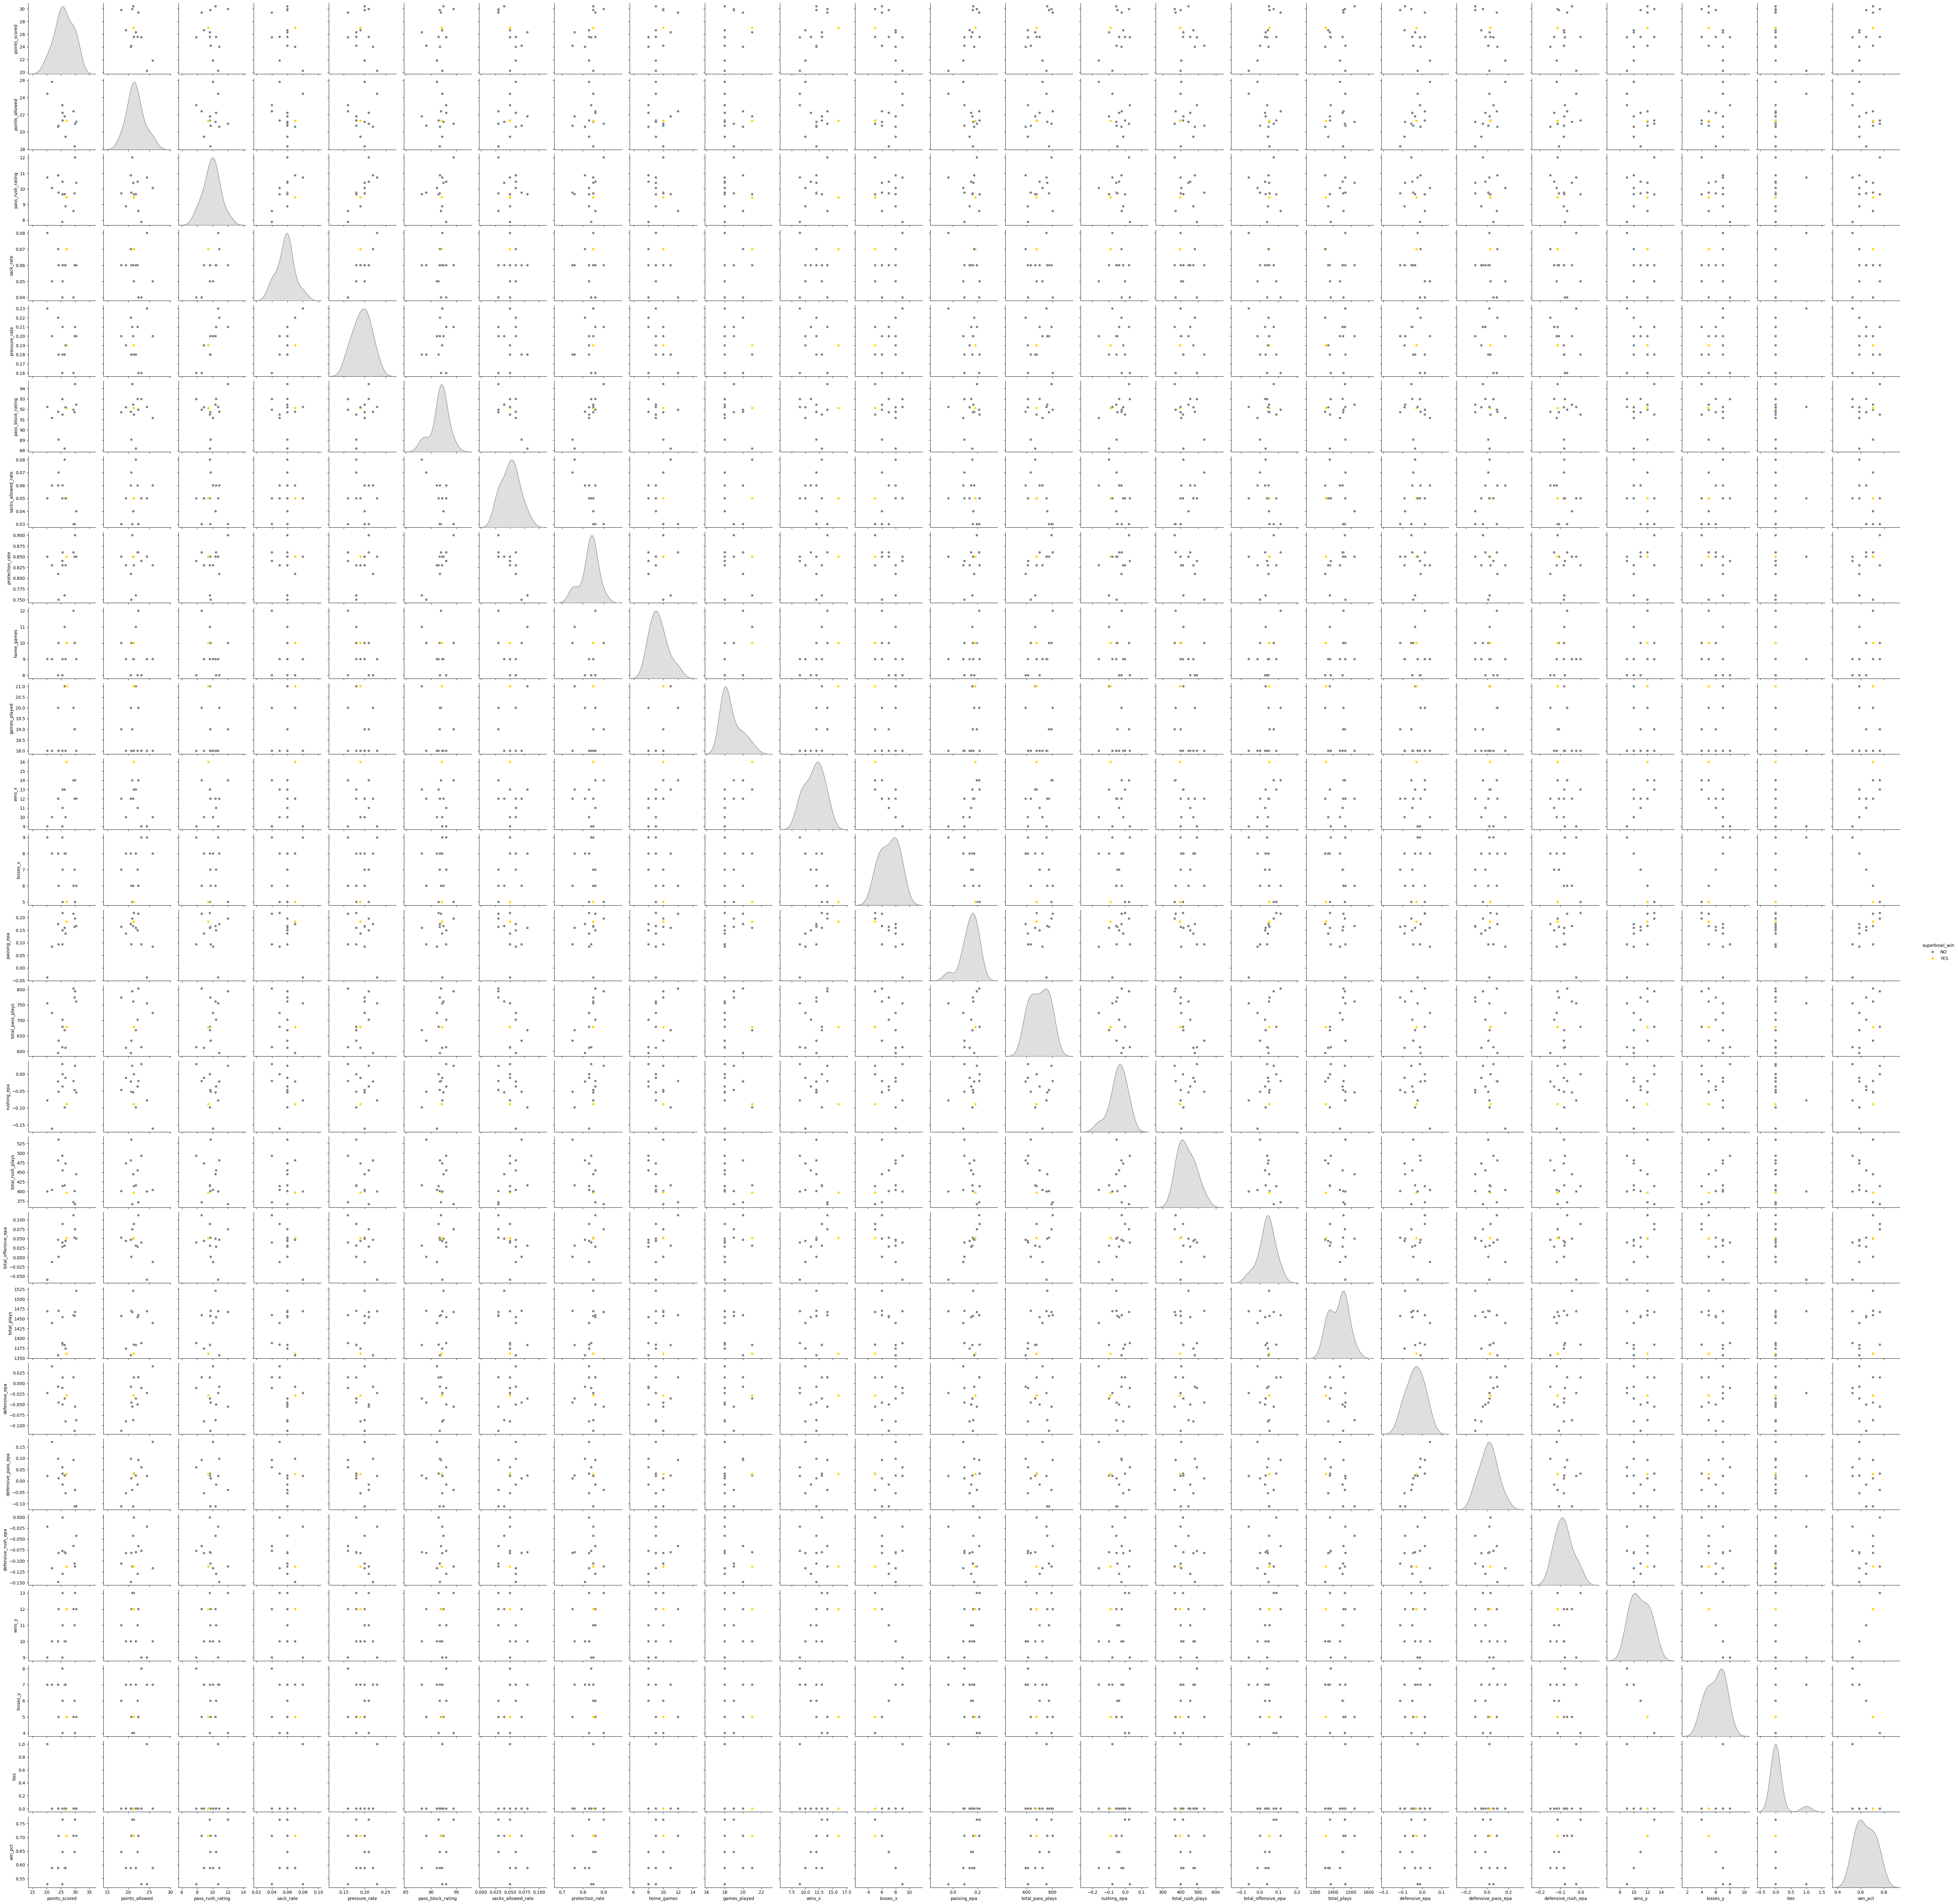

In [82]:
pairplot = sns.pairplot(NFL_2021_team_stats, hue='superbowl_win', palette={'YES': 'gold', 'NO': 'gray'})
pairplot.savefig('my_pairplot.png', dpi=300, bbox_inches='tight')

In [83]:
pairplot.savefig('my_pairplot.png', dpi=300, bbox_inches='tight')

In [84]:
df_playoff_teams = df.copy()

In [85]:
df_playoff_teams

season game_type  week away_team  away_score home_team  \
game_id                                                                   
2021_01_DAL_TB     2021       REG     1       DAL          29        TB   
2021_01_PHI_ATL    2021       REG     1       PHI          32       ATL   
2021_01_PIT_BUF    2021       REG     1       PIT          23       BUF   
2021_01_MIN_CIN    2021       REG     1       MIN          24       CIN   
2021_01_SF_DET     2021       REG     1        SF          41       DET   
...                 ...       ...   ...       ...         ...       ...   
2021_20_LA_TB      2021       DIV    20        LA          30        TB   
2021_20_BUF_KC     2021       DIV    20       BUF          36        KC   
2021_21_CIN_KC     2021       CON    21       CIN          27        KC   
2021_21_SF_LA      2021       CON    21        SF          17        LA   
2021_22_LA_CIN     2021        SB    22        LA          23       CIN   

                 home_score location  result  total  ...  hits_allowed_rate.x  \
game_id                                              ...                        
2021_01_DAL_TB           31     Home       2     60  ...             0.071788   
2021_01_PHI_ATL           6     Home     -26     38  ...             0.193985   
2021_01_PIT_BUF          16     Home      -7     39  ...             0.117571   
2021_01_MIN_CIN          27     Home       3     51  ...             0.157186   
2021_01_SF_DET           33     Home      -8     74  ...             0.137778   
...                     ...      ...     ...    ...  ...                  ...   
2021_20_LA_TB            27     Home      -3     57  ...             0.071788   
2021_20_BUF_KC           42     Home       6     78  ...             0.108344   
2021_21_CIN_KC           24     Home      -3     51  ...             0.108344   
2021_21_SF_LA            20     Home       3     37  ...             0.109145   
2021_22_LA_CIN           20  Neutral      -3     43  ...             0.157186   

                 home_protection_rate  away_pass_rush_rating  away_sack_rate  \
game_id                                                                        
2021_01_DAL_TB               0.899244              10.390516        0.055935   
2021_01_PHI_ATL              0.745865               7.881417        0.042773   
2021_01_PIT_BUF              0.847545              10.729023        0.080058   
2021_01_MIN_CIN              0.760479              10.197145        0.067639   
2021_01_SF_DET               0.808889              10.871184        0.071535   
...                               ...                    ...             ...   
2021_20_LA_TB                0.899244               9.447166        0.068587   
2021_20_BUF_KC               0.856787               9.706546        0.063733   
2021_21_CIN_KC               0.856787               9.656652        0.057299   
2021_21_SF_LA                0.845133              10.871184        0.071535   
2021_22_LA_CIN               0.760479               9.447166        0.068587   

                 qb_hit_rate.y  away_pressure_rate  away_pass_block_rating  \
game_id                                                                      
2021_01_DAL_TB        0.147340            0.203274               92.441472   
2021_01_PHI_ATL       0.117994            0.160767               92.982456   
2021_01_PIT_BUF       0.147016            0.227074               92.216817   
2021_01_MIN_CIN       0.131300            0.198939               91.159830   
2021_01_SF_DET        0.146051            0.217586               91.754123   
...                        ...                 ...                     ...   
2021_20_LA_TB         0.116598            0.185185               92.111195   
2021_20_BUF_KC        0.132018            0.195751               91.713483   
2021_21_CIN_KC        0.126876            0.184175               88.183161   
2021_21_SF_LA         0.146051            0.217586               91.754123   
2021_22_LA

In [89]:
df_playoff_teams = df_playoff_teams[df_playoff_teams['game_type'] != 'WC']
df_playoff_teams = df_playoff_teams[df_playoff_teams['game_type'] != 'DIV']
df_playoff_teams = df_playoff_teams[df_playoff_teams['game_type'] != 'CON']
df_playoff_teams = df_playoff_teams[df_playoff_teams['game_type'] != 'SB']

In [90]:
df_playoff_teams

season game_type  week away_team  away_score home_team  \
game_id                                                                   
2021_01_DAL_TB     2021       REG     1       DAL          29        TB   
2021_01_PHI_ATL    2021       REG     1       PHI          32       ATL   
2021_01_PIT_BUF    2021       REG     1       PIT          23       BUF   
2021_01_MIN_CIN    2021       REG     1       MIN          24       CIN   
2021_01_SF_DET     2021       REG     1        SF          41       DET   
...                 ...       ...   ...       ...         ...       ...   
2021_18_NYJ_BUF    2021       REG    18       NYJ          10       BUF   
2021_18_SF_LA      2021       REG    18        SF          27        LA   
2021_18_NE_MIA     2021       REG    18        NE          24       MIA   
2021_18_CAR_TB     2021       REG    18       CAR          17        TB   
2021_18_LAC_LV     2021       REG    18       LAC          32        LV   

                 home_score location  result  total  ...  hits_allowed_rate.x  \
game_id                                              ...                        
2021_01_DAL_TB           31     Home       2     60  ...             0.071788   
2021_01_PHI_ATL           6     Home     -26     38  ...             0.193985   
2021_01_PIT_BUF          16     Home      -7     39  ...             0.117571   
2021_01_MIN_CIN          27     Home       3     51  ...             0.157186   
2021_01_SF_DET           33     Home      -8     74  ...             0.137778   
...                     ...      ...     ...    ...  ...                  ...   
2021_18_NYJ_BUF          27     Home      17     37  ...             0.117571   
2021_18_SF_LA            24     Home      -3     51  ...             0.109145   
2021_18_NE_MIA           33     Home       9     57  ...             0.114286   
2021_18_CAR_TB           41     Home      24     58  ...             0.071788   
2021_18_LAC_LV           35     Home       3     67  ...             0.117403   

                 home_protection_rate  away_pass_rush_rating  away_sack_rate  \
game_id                                                                        
2021_01_DAL_TB               0.899244              10.390516        0.055935   
2021_01_PHI_ATL              0.745865               7.881417        0.042773   
2021_01_PIT_BUF              0.847545              10.729023        0.080058   
2021_01_MIN_CIN              0.760479              10.197145        0.067639   
2021_01_SF_DET               0.808889              10.871184        0.071535   
...                               ...                    ...             ...   
2021_18_NYJ_BUF              0.847545               8.108108        0.048529   
2021_18_SF_LA                0.845133              10.871184        0.071535   
2021_18_NE_MIA               0.831293               8.878856        0.056962   
2021_18_CAR_TB               0.899244               9.407407        0.064145   
2021_18_LAC_LV               0.827348               8.581560        0.052553   

                 qb_hit_rate.y  away_pressure_rate  away_pass_block_rating  \
game_id                                                                      
2021_01_DAL_TB        0.147340            0.203274               92.441472   
2021_01_PHI_ATL       0.117994            0.160767               92.982456   
2021_01_PIT_BUF       0.147016            0.227074               92.216817   
2021_01_MIN_CIN       0.131300            0.198939               91.159830   
2021_01_SF_DET        0.146051            0.217586               91.754123   
...                        ...                 ...                     ...   
2021_18_NYJ_BUF       0.123529            0.172059               88.682055   
2021_18_SF_LA         0.146051            0.217586               91.754123   
2021_18_NE_MIA        0.129747            0.186709               92.193309   
2021_18_CAR_TB        0.144737            0.208882               88.809694   
2021_18_LA

In [94]:
playoff_teams = ['TB', 'DAL', 'LA', 'GB', 'ARI', 'SF', 'PHI',  # NFC
                 'TEN', 'KC', 'BUF', 'CIN', 'LV', 'NE', 'PIT']  # AFC
away_stats = df_playoff_teams.copy()
away_stats['team'] = away_stats['away_team']
away_stats['opponent'] = away_stats['home_team']
away_stats['points_scored'] = away_stats['away_score']
away_stats['points_allowed'] = away_stats['home_score']
away_stats['is_home'] = 0
away_stats = away_stats.rename(columns={
    'away_pass_rush_rating': 'pass_rush_rating',
    'away_sack_rate': 'sack_rate',
    'away_pressure_rate': 'pressure_rate',
    'away_pass_block_rating': 'pass_block_rating',
    'away_sacks_allowed_rate': 'sacks_allowed_rate',
    'away_protection_rate': 'protection_rate',
    'away_qb_name': 'qb_name',
    'away_coach': 'coach',
    'away_rest': 'rest_days',
    'away_moneyline': 'moneyline'
})
home_stats = df_playoff_teams.copy()
home_stats['team'] = home_stats['home_team']
home_stats['opponent'] = home_stats['away_team']
home_stats['points_scored'] = home_stats['home_score']
home_stats['points_allowed'] = home_stats['away_score']
home_stats['is_home'] = 1
home_stats = home_stats.rename(columns={
    'home_pass_rush_rating': 'pass_rush_rating',
    'home_sack_rate': 'sack_rate',
    'home_pressure_rate': 'pressure_rate',
    'home_pass_block_rating': 'pass_block_rating',
    'home_sacks_allowed_rate': 'sacks_allowed_rate',
    'home_protection_rate': 'protection_rate',
    'home_qb_name': 'qb_name',
    'home_coach': 'coach',
    'home_rest': 'rest_days',
    'home_moneyline': 'moneyline'
})
cols_to_keep = ['team', 'opponent', 'points_scored', 'points_allowed', 
                'is_home', 'pass_rush_rating', 'sack_rate', 'pressure_rate',
                'pass_block_rating', 'sacks_allowed_rate', 'protection_rate',
                'qb_name', 'coach', 'rest_days', 'week', 'season']

combined_stats = pd.concat([
    away_stats[cols_to_keep],
    home_stats[cols_to_keep]
])
team_stats_playoffs = combined_stats.groupby('team').agg({
    'points_scored': 'mean',
    'points_allowed': 'mean',
    'pass_rush_rating': 'mean',
    'sack_rate': 'mean',
    'pressure_rate': 'mean',
    'pass_block_rating': 'mean',
    'sacks_allowed_rate': 'mean',
    'protection_rate': 'mean',
    'is_home': 'sum',  # Total home games
    'week': 'count'  # Total games played
}).round(2)
team_stats_playoffs = team_stats_playoffs.rename(columns={
    'week': 'games_played',
    'is_home': 'home_games'
})
wins = combined_stats[combined_stats['points_scored'] > combined_stats['points_allowed']].groupby('team').size()
team_stats_playoffs['wins'] = wins
team_stats_playoffs['losses'] = team_stats_playoffs['games_played'] - team_stats_playoffs['wins']
team_stats_playoffs['primary_qb'] = combined_stats.groupby('team')['qb_name'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
team_stats_playoffs['coach'] = combined_stats.groupby('team')['coach'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
team_stats_playoffs = team_stats_playoffs.reset_index()
team_stats_playoffs = team_stats_playoffs[team_stats_playoffs['team'].isin(playoff_teams)]


In [95]:
team_stats_playoffs

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
0   ARI          26.41           21.53             10.46       0.06   
3   BUF          28.41           17.00              9.71       0.06   
6   CIN          27.06           22.12              9.66       0.06   
8   DAL          31.18           21.06             10.39       0.06   
11   GB          26.47           21.82              9.65       0.05   
15   KC          28.24           21.41              8.58       0.04   
16   LA          27.06           21.88              9.45       0.07   
18   LV          22.00           25.82             10.06       0.05   
21   NE          27.18           17.82              8.88       0.06   
25  PHI          26.12           22.65              7.88       0.04   
26  PIT          20.18           23.41             10.73       0.08   
28   SF          25.12           21.47             10.87       0.07   
29   TB          30.06           20.76             12.02       0.06   
30  TEN          24.65           20.82              9.76       0.06   

    pressure_rate  pass_block_rating  sacks_allowed_rate  protection_rate  \
0            0.21              93.00                0.06             0.86   
3            0.20              91.71                0.03             0.85   
6            0.18              88.18                0.08             0.76   
8            0.20              92.44                0.04             0.85   
11           0.18              91.48                0.05             0.83   
15           0.16              91.95                0.03             0.86   
16           0.19              92.11                0.05             0.85   
18           0.20              91.15                0.06             0.83   
21           0.19              92.19                0.05             0.83   
25           0.16              92.98                0.05             0.84   
26           0.23              92.22                0.05             0.85   
28           0.22              91.75                0.06             0.81   
29           0.21              94.44                0.03             0.90   
30           0.18              89.05                0.07             0.75   

    home_games  games_played  wins  losses          primary_qb  \
0            8            17  11.0     6.0        Kyler Murray   
3            9            17  11.0     6.0          Josh Allen   
6            9            17  10.0     7.0          Joe Burrow   
8            8            17  12.0     5.0        Dak Prescott   
11           8            17  13.0     4.0       Aaron Rodgers   
15           9            17  12.0     5.0     Patrick Mahomes   
16           8            17  12.0     5.0    Matthew Stafford   
18           9            17  10.0     7.0          Derek Carr   
21           9            17  10.0     7.0           Mac Jones   
25           8            17   9.0     8.0         Jalen Hurts   
26           9            17   9.0     8.0  Ben Roethlisberger   
28           8            17  10.0     7.0     Jimmy Garoppolo   
29           8            17  13.0     4.0           Tom Brady   
30           9            17  12.0     5.0      Ryan Tannehill   

              coach  
0   Kliff Kingsbury  
3    Sean McDermott  
6        Zac Taylor  
8     Mike McCarthy  
11     Matt LaFleur  
15        Andy Reid  
16       Sean McVay  
18    Rich Bisaccia  
21   Bill Belichick  
25    Nick Sirianni  
26      Mike Tomlin  
28    Kyle Shanahan  
29     Bruce Arians  
30      Mike Vrabel

In [96]:
team_stats_playoffs["team"] = team_stats_playoffs["team"].replace({"LA": "LAR"})

In [97]:
team_stats_playoffs

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
0   ARI          26.41           21.53             10.46       0.06   
3   BUF          28.41           17.00              9.71       0.06   
6   CIN          27.06           22.12              9.66       0.06   
8   DAL          31.18           21.06             10.39       0.06   
11   GB          26.47           21.82              9.65       0.05   
15   KC          28.24           21.41              8.58       0.04   
16  LAR          27.06           21.88              9.45       0.07   
18   LV          22.00           25.82             10.06       0.05   
21   NE          27.18           17.82              8.88       0.06   
25  PHI          26.12           22.65              7.88       0.04   
26  PIT          20.18           23.41             10.73       0.08   
28   SF          25.12           21.47             10.87       0.07   
29   TB          30.06           20.76             12.02       0.06   
30  TEN          24.65           20.82              9.76       0.06   

    pressure_rate  pass_block_rating  sacks_allowed_rate  protection_rate  \
0            0.21              93.00                0.06             0.86   
3            0.20              91.71                0.03             0.85   
6            0.18              88.18                0.08             0.76   
8            0.20              92.44                0.04             0.85   
11           0.18              91.48                0.05             0.83   
15           0.16              91.95                0.03             0.86   
16           0.19              92.11                0.05             0.85   
18           0.20              91.15                0.06             0.83   
21           0.19              92.19                0.05             0.83   
25           0.16              92.98                0.05             0.84   
26           0.23              92.22                0.05             0.85   
28           0.22              91.75                0.06             0.81   
29           0.21              94.44                0.03             0.90   
30           0.18              89.05                0.07             0.75   

    home_games  games_played  wins  losses          primary_qb  \
0            8            17  11.0     6.0        Kyler Murray   
3            9            17  11.0     6.0          Josh Allen   
6            9            17  10.0     7.0          Joe Burrow   
8            8            17  12.0     5.0        Dak Prescott   
11           8            17  13.0     4.0       Aaron Rodgers   
15           9            17  12.0     5.0     Patrick Mahomes   
16           8            17  12.0     5.0    Matthew Stafford   
18           9            17  10.0     7.0          Derek Carr   
21           9            17  10.0     7.0           Mac Jones   
25           8            17   9.0     8.0         Jalen Hurts   
26           9            17   9.0     8.0  Ben Roethlisberger   
28           8            17  10.0     7.0     Jimmy Garoppolo   
29           8            17  13.0     4.0           Tom Brady   
30           9            17  12.0     5.0      Ryan Tannehill   

              coach  
0   Kliff Kingsbury  
3    Sean McDermott  
6        Zac Taylor  
8     Mike McCarthy  
11     Matt LaFleur  
15        Andy Reid  
16       Sean McVay  
18    Rich Bisaccia  
21   Bill Belichick  
25    Nick Sirianni  
26      Mike Tomlin  
28    Kyle Shanahan  
29     Bruce Arians  
30      Mike Vrabel

In [98]:
NFL_2021_team_REG_stats = team_stats_playoffs.merge(df_epa_2021, on='team', how='left').set_index("playoff_seed").sort_values('playoff_seed')

In [99]:
NFL_2021_team_REG_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          26.47           21.82              9.65       0.05   
1.0           TEN          24.65           20.82              9.76       0.06   
2.0            KC          28.24           21.41              8.58       0.04   
2.0            TB          30.06           20.76             12.02       0.06   
3.0           BUF          28.41           17.00              9.71       0.06   
3.0           DAL          31.18           21.06             10.39       0.06   
4.0           CIN          27.06           22.12              9.66       0.06   
4.0           LAR          27.06           21.88              9.45       0.07   
5.0           ARI          26.41           21.53             10.46       0.06   
5.0            LV          22.00           25.82             10.06       0.05   
6.0            NE          27.18           17.82              8.88       0.06   
6.0            SF          25.12           21.47             10.87       0.07   
7.0           PHI          26.12           22.65              7.88       0.04   
7.0           PIT          20.18           23.41             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  home_games  ...  total_plays  defensive_epa  \
playoff_seed                               ...                               
1.0                      0.83           8  ...         1384       0.014161   
1.0                      0.75           9  ...         1470      -0.045445   
2.0                      0.86           9  ...         1459       0.014553   
2.0                      0.90           8  ...         1467      -0.055117   
3.0                      0.85           9  ...         1457      -0.112458   
3.0                      0.85           8  ...         1521      -0.087157   
4.0                      0.76           9  ...         1383      -0.035780   
4.0                      0.85           8  ...         1361      -0.028633   
5.0                      0.86           8  ...         1454      -0.050086   
5.0                      0.83           9  ...         1439       0.040506   
6.0                      0.83           9  ...         1374      -0.090059   
6.0                      0.81           8  ...         1357      -0.007788   
7.0                      0.84           8  ...         1388      -0.010782   
7.0                      0.85           9  ...         1469      -0.022900   

              defensive_pass_epa defensive_rush_epa wins_y  losses_y  ties  \
playoff_seed                                                                 
1.0                     0.032454          -0.000626     13         4     0   
1.0                     0.011451          -0.081972     12         5     0   
2.0                     0.091933  

In [100]:
NFL_2021_team_REG_stats = NFL_2021_team_REG_stats.drop(columns = ["made_playoffs", "home_games", "total_plays"])

In [101]:
NFL_2021_team_REG_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          26.47           21.82              9.65       0.05   
1.0           TEN          24.65           20.82              9.76       0.06   
2.0            KC          28.24           21.41              8.58       0.04   
2.0            TB          30.06           20.76             12.02       0.06   
3.0           BUF          28.41           17.00              9.71       0.06   
3.0           DAL          31.18           21.06             10.39       0.06   
4.0           CIN          27.06           22.12              9.66       0.06   
4.0           LAR          27.06           21.88              9.45       0.07   
5.0           ARI          26.41           21.53             10.46       0.06   
5.0            LV          22.00           25.82             10.06       0.05   
6.0            NE          27.18           17.82              8.88       0.06   
6.0            SF          25.12           21.47             10.87       0.07   
7.0           PHI          26.12           22.65              7.88       0.04   
7.0           PIT          20.18           23.41             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  games_played  ...  total_rush_plays  \
playoff_seed                                 ...                     
1.0                      0.83            17  ...               414   
1.0                      0.75            17  ...               535   
2.0                      0.86            17  ...               372   
2.0                      0.90            17  ...               367   
3.0                      0.85            17  ...               401   
3.0                      0.85            17  ...               445   
4.0                      0.76            17  ...               416   
4.0                      0.85            17  ...               397   
5.0                      0.86            17  ...               455   
5.0                      0.83            17  ...               404   
6.0                      0.83            17  ...               473   
6.0                      0.81            17  ...               481   
7.0                      0.84            17  ...               493   
7.0                      0.85            17  ...               400   

              total_offensive_epa defensive_epa defensive_pass_epa  \
playoff_seed                                                         
1.0                      0.088942      0.014161           0.032454   
1.0                      0.001659     -0.045445           0.011451   
2.0                      0.112198      0.014553           0.091933   
2.0                      0.074884     -0.055117          -0.039383   
3.0                      0.052488     -0.112458       

In [102]:
NFL_2021_team_REG_stats["superbowl_win"] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [103]:
NFL_2021_team_REG_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          26.47           21.82              9.65       0.05   
1.0           TEN          24.65           20.82              9.76       0.06   
2.0            KC          28.24           21.41              8.58       0.04   
2.0            TB          30.06           20.76             12.02       0.06   
3.0           BUF          28.41           17.00              9.71       0.06   
3.0           DAL          31.18           21.06             10.39       0.06   
4.0           CIN          27.06           22.12              9.66       0.06   
4.0           LAR          27.06           21.88              9.45       0.07   
5.0           ARI          26.41           21.53             10.46       0.06   
5.0            LV          22.00           25.82             10.06       0.05   
6.0            NE          27.18           17.82              8.88       0.06   
6.0            SF          25.12           21.47             10.87       0.07   
7.0           PHI          26.12           22.65              7.88       0.04   
7.0           PIT          20.18           23.41             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  games_played  ...  total_offensive_epa  \
playoff_seed                                 ...                        
1.0                      0.83            17  ...             0.088942   
1.0                      0.75            17  ...             0.001659   
2.0                      0.86            17  ...             0.112198   
2.0                      0.90            17  ...             0.074884   
3.0                      0.85            17  ...             0.052488   
3.0                      0.85            17  ...             0.049949   
4.0                      0.76            17  ...             0.031365   
4.0                      0.85            17  ...             0.051235   
5.0                      0.86            17  ...             0.028637   
5.0                      0.83            17  ...            -0.012110   
6.0                      0.83            17  ...             0.043844   
6.0                      0.81            17  ...             0.046891   
7.0                      0.84            17  ...             0.039606   
7.0                      0.85            17  ...            -0.059187   

              defensive_epa defensive_pass_epa defensive_rush_epa  wins_y  \
playoff_seed                                                                
1.0                0.014161           0.032454          -0.000626      13   
1.0               -0.045445           0.011451          -0.081972      12   
2.0                0.014553           0.091933          -0.066177      12   
2.0               -0.055117          -0.0

In [104]:
NFL_2021_team_REG_stats["superbowl_win"] = NFL_2021_team_REG_stats["superbowl_win"].replace({0: "NO", 1: "YES"})

In [105]:
NFL_2021_team_REG_stats

team  points_scored  points_allowed  pass_rush_rating  sack_rate  \
playoff_seed                                                                    
1.0            GB          26.47           21.82              9.65       0.05   
1.0           TEN          24.65           20.82              9.76       0.06   
2.0            KC          28.24           21.41              8.58       0.04   
2.0            TB          30.06           20.76             12.02       0.06   
3.0           BUF          28.41           17.00              9.71       0.06   
3.0           DAL          31.18           21.06             10.39       0.06   
4.0           CIN          27.06           22.12              9.66       0.06   
4.0           LAR          27.06           21.88              9.45       0.07   
5.0           ARI          26.41           21.53             10.46       0.06   
5.0            LV          22.00           25.82             10.06       0.05   
6.0            NE          27.18           17.82              8.88       0.06   
6.0            SF          25.12           21.47             10.87       0.07   
7.0           PHI          26.12           22.65              7.88       0.04   
7.0           PIT          20.18           23.41             10.73       0.08   

              pressure_rate  pass_block_rating  sacks_allowed_rate  \
playoff_seed                                                         
1.0                    0.18              91.48                0.05   
1.0                    0.18              89.05                0.07   
2.0                    0.16              91.95                0.03   
2.0                    0.21              94.44                0.03   
3.0                    0.20              91.71                0.03   
3.0                    0.20              92.44                0.04   
4.0                    0.18              88.18                0.08   
4.0                    0.19              92.11                0.05   
5.0                    0.21              93.00                0.06   
5.0                    0.20              91.15                0.06   
6.0                    0.19              92.19                0.05   
6.0                    0.22              91.75                0.06   
7.0                    0.16              92.98                0.05   
7.0                    0.23              92.22                0.05   

              protection_rate  games_played  ...  total_offensive_epa  \
playoff_seed                                 ...                        
1.0                      0.83            17  ...             0.088942   
1.0                      0.75            17  ...             0.001659   
2.0                      0.86            17  ...             0.112198   
2.0                      0.90            17  ...             0.074884   
3.0                      0.85            17  ...             0.052488   
3.0                      0.85            17  ...             0.049949   
4.0                      0.76            17  ...             0.031365   
4.0                      0.85            17  ...             0.051235   
5.0                      0.86            17  ...             0.028637   
5.0                      0.83            17  ...            -0.012110   
6.0                      0.83            17  ...             0.043844   
6.0                      0.81            17  ...             0.046891   
7.0                      0.84            17  ...             0.039606   
7.0                      0.85            17  ...            -0.059187   

              defensive_epa defensive_pass_epa defensive_rush_epa  wins_y  \
playoff_seed                                                                
1.0                0.014161           0.032454          -0.000626      13   
1.0               -0.045445           0.011451          -0.081972      12   
2.0                0.014553           0.091933          -0.066177      12   
2.0               -0.055117          -0.0

In [106]:
sns.pairplot(NFL_2021_team_REG_stats, hue='superbowl_win', palette={'YES': 'gold', 'NO': 'gray'}, height=4)